In [1]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics
import string 
import spacy
import requests
import json

C:\Users\Hp\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('Database_C.csv')
df

,code,error_check
0,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
1,"#include <stdio.h>\nint main(){\n int n,i,b...",0
2,#include <stdio.h>\n#include <stdlib.h>\n#incl...,0
3,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
4,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
...,...,...
53473,#include<stdio.h>\n#include<stdlib.h>\nint mai...,1
53474,#include<stdio.h>\n#include<stdlib.h>\nint mai...,1
53475,"#include<stdio.h>\nint main()\n{\n int n,k,...",1
53476,"#include<stdio.h>\nint main()\n{\n int n,k;...",1


In [3]:
df_0 = df[df['error_check']!=1]
df_0

,code,error_check
0,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
1,"#include <stdio.h>\nint main(){\n int n,i,b...",0
2,#include <stdio.h>\n#include <stdlib.h>\n#incl...,0
3,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
4,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
...,...,...
46495,"#include <stdio.h>\nint main()\n{\n int n, ...",0
46496,#include <stdio.h>\n#include <stdlib.h>\nint B...,0
46497,#include<stdio.h>\nint arr[100];\nint max;\nin...,0
46498,#include <stdio.h>\nint a[100000];\nvoid swap(...,0


In [4]:
df_1 = df[df['error_check']!=0]
df_1

,code,error_check
46500,"#include <stdio.h>\nint main(){\n int k,n;\...",1
46501,"#include <stdio.h>\nint main()\n{\n int k,n...",1
46502,"#include <stdio.h>\nint main(){\n int k,n,i...",1
46503,"#include <stdio.h>\nint main(){\nint i,k,n,a;\...",1
46504,"#include <stdio.h>\nint main(){int i,c,b,d=0,a...",1
...,...,...
53473,#include<stdio.h>\n#include<stdlib.h>\nint mai...,1
53474,#include<stdio.h>\n#include<stdlib.h>\nint mai...,1
53475,"#include<stdio.h>\nint main()\n{\n int n,k,...",1
53476,"#include<stdio.h>\nint main()\n{\n int n,k;...",1


In [5]:
df_0['error_check'].value_counts()

0    46500
Name: error_check, dtype: int64

In [6]:
df_1['error_check'].value_counts()

1    6978
Name: error_check, dtype: int64

In [7]:
df_0.drop(index=df_0.index[100:], axis=0, inplace=True)
df_0

C:\Users\Hp\AppData\Local\Temp\ipykernel_19272\120743725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0.drop(index=df_0.index[100:], axis=0, inplace=True)


,code,error_check
0,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
1,"#include <stdio.h>\nint main(){\n int n,i,b...",0
2,#include <stdio.h>\n#include <stdlib.h>\n#incl...,0
3,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
4,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
...,...,...
95,#include <stdio.h>\nint arr[100]={0};\nint n;\...,0
96,"#include<stdio.h>\nint main()\n{int e,f,g;\nsc...",0
97,#include <stdio.h>\r\nint main()\r\n{\r\n i...,0
98,#include <stdio.h>\n#include <stdlib.h>\nint m...,0


In [8]:
df_1.drop(index=df_1.index[100:], axis=0, inplace=True)
df_1

C:\Users\Hp\AppData\Local\Temp\ipykernel_19272\845745786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(index=df_1.index[100:], axis=0, inplace=True)


,code,error_check
46500,"#include <stdio.h>\nint main(){\n int k,n;\...",1
46501,"#include <stdio.h>\nint main()\n{\n int k,n...",1
46502,"#include <stdio.h>\nint main(){\n int k,n,i...",1
46503,"#include <stdio.h>\nint main(){\nint i,k,n,a;\...",1
46504,"#include <stdio.h>\nint main(){int i,c,b,d=0,a...",1
...,...,...
46595,"#include <stdio.h>\n\nint main(){\n int n,m...",1
46596,#include <stdio.h>\n\nint main()\n{\n int n...,1
46597,#include <stdio.h>\n\nint main()\n{\n int ...,1
46598,#include <stdio.h>\n\nint main()\n{\n int n...,1


In [9]:
df_0.squeeze()
df_1.squeeze() 

,code,error_check
46500,"#include <stdio.h>\nint main(){\n int k,n;\...",1
46501,"#include <stdio.h>\nint main()\n{\n int k,n...",1
46502,"#include <stdio.h>\nint main(){\n int k,n,i...",1
46503,"#include <stdio.h>\nint main(){\nint i,k,n,a;\...",1
46504,"#include <stdio.h>\nint main(){int i,c,b,d=0,a...",1
...,...,...
46595,"#include <stdio.h>\n\nint main(){\n int n,m...",1
46596,#include <stdio.h>\n\nint main()\n{\n int n...,1
46597,#include <stdio.h>\n\nint main()\n{\n int ...,1
46598,#include <stdio.h>\n\nint main()\n{\n int n...,1


In [10]:
df_new = pd.concat([df_0,df_1])

In [11]:
df_new['error_check'].value_counts()

0    100
1    100
Name: error_check, dtype: int64

In [12]:
import spacy

In [13]:
en_core = spacy.load('en_core_web_sm')

In [14]:
def my_tokenizer(code):
    code_vec = en_core(code)
    tokens = [x.lemma_.lower().strip() for x in code_vec]
    print(tokens)
    return tokens

In [15]:
from sklearn.model_selection import train_test_split
X = df_new['code']
y = df_new['error_check']


In [16]:
X.shape,y.shape

((200,), (200,))

In [17]:
y.value_counts()

0    100
1    100
Name: error_check, dtype: int64

In [18]:
X_train,X_rem, y_train,y_rem = train_test_split(X,y,train_size=0.9,shuffle=True,stratify=y)

In [19]:
X_val,X_test, y_val,y_test = train_test_split(X_rem,y_rem,test_size=0.5,shuffle = True)

In [20]:
tfidf_vector = TfidfVectorizer(tokenizer=my_tokenizer)

In [21]:
X_train_vec = tfidf_vector.fit_transform(X_train)
X_val_vec = tfidf_vector.transform(X_val)
X_test_vec = tfidf_vector.transform(X_test)

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '', '{', '', 'int', 'n', ',', 'm', ',', 'a', ',', 'i', ',', 'j', ',', 'max', ',', 'sum', ';', '', 'max=0', ';', '', 'sum=0', ';', '', 'scanf("%d%d', '/', 'n",&n,&m', ')', ';', '', 'for(i=0;i', '<', 'n;i++', ')', '{', '', 'for(j=0;j', '<', 'm;j++){scanf("%d",&a', ')', ';', '', 'sum', '=', 'sum+a', ';', '', '}', '', 'if(max', '<', 'sum){max', '=', 'sum', ';', '}', '', 'else{sum=0', ';', '}', '', 'scanf("/n', '"', ')', ';', '}', '', 'printf("%d",max', ')', ';', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'x', ',', 'y', ';', '', 'int', 'max(int', 'num1[x],int', 'num2[y', ']', ')', '', '{', 'if(num1[x]<num2[y', ']', ')', '', 'return', 'y', ';', '', 'else', '', 'return', 'x', ';', '', '}', '', 'int', 'min(int', 'num1[x],int', 'num2[y', ']', ')', '', '{', 'if(num1[x]<num2[y', ']', ')', '', 'return', 'x', ';', '', 'else', '', 'return', 'y', ';', '', '}', '', 'int', 'main', '(', ')', '{', ''

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'min(int', 'a', ',', 'int', 'b', ')', '', '{', '', 'if(a', '<', 'b', ')', '', 'return', 'a', ';', '', 'else', '', 'return', 'b', ';', '', '}', '', 'int', 'main', '(', ')', '{', '', 'int', 'n', ',', 'count', ',', 'a', ',', 'b', ',', 'c', ';', '', 'scanf("%d",&n', ')', ';', '', 'int', 'arr[n],s[n', ']', ';', '', 'for', '(', 'int', 'i=0;i', '<', 'n;i++', ')', '', '{', '', 'scanf("%d",&arr[i', ']', ')', ';', '', 'for', '(', 'int', 'j=0;j', '<', 'n;j++', ')', '', '{', '', 'count=0', ';', '', 'scanf("%d",&arr[j', ']', ')', ';', '', 'if(arr[i]==min(arr[i],arr[j', ']', ')', ')', '', 'count', '=', 'count', '+', '1', ';', '', '}', '', 'arr[i]=s[n', '-', 'count', ']', ';', '', '}', '', 'for', '(', 'int', 'j=0;j', '<', 'n;j++', ')', '', '{', '', 'printf("%d', '"', ',', 's[j', ']', ')', ';', '', '}', '', 'printf("end', '"', ')', ';', '//do', 'not', 'modify', 'this', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'ma

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', '//', 'insert', 'your', 'code', 'here', '', 'int', 'k', ',', 'n', ',', 'count=0', ';', '', 'scanf("%d', '%', 'd",&k,&n', ')', ';', '', 'int', 'a[n', ']', ';', '', 'scanf(int', 'i=0;i', '<', 'n;i++', ')', '', '{', '', 'scanf("%d",&a[i', ']', ')', ';', '', '}', '', 'for(int', 'i=0;i', '<', 'n;i++', ')', '', '{', '', 'for(int', 'j=0;j', '<', 'n;j++', ')', '', '{', '', 'if(a[j]>=a[i]&&a[j]<k', ')', '', '{', '', 'int', 't', '=', 'a[i', ']', ';', '', 'a[i]=a[j', ']', ';', '', 'a[j]=t', ';', '', '}', '', '}', '', '}', '', 'for(int', 'i=0;i', '<', 'n;i++', ')', '', '{', '', 'if(a[i]<k)count', '=', 'count+1', ';', '', '}', '', 'printf("%d",count', ')', ';', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', '#', 'include', '<', 'stdlib.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'i', ',', 'n', ',', 'k', ',', 'x=0', ';', '', 'char', 'a[20', ']', ';', '', 'scanf("%d\\n",&n', ')', ';', '',

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'k', ',', 'i', ',', 'j', ',', 'n', ',', 'list[1000],flag=0;//list', '=', 'list', 'of', 'number', '', 'int', '', 'scanf("%d",&k', ')', ';', '', 'scanf("%d",&n', ')', ';', '', 'for(i=0;i', '<', 'n;i++', ')', '', '{', '', 'scanf("%d",&list[i', ']', ')', ';', '', '//scan', 'number', 'in', "'", 'list', "'", 'array', '', 'for(j=0;j', '<', 'i;j++', ')', '', '{', '', 'if(k', '=', '=', 'list[i', ']', '+', 'list[j])//check', 'if', '(', 'ith', 'no', ')', '+', '(', 'no', 'read', 'till', 'now', ')', 'equal', 'k', '', '{', '', 'flag=1', ';', '', 'break', ';', '', '//if', 'yes', 'no', 'need', 'to', 'check', 'above', 'cond', '.', 'far', '', '}', '', '}', '', 'if(flag==1)//i.e', '.', 'if', 'found', 'two', 'require', 'number', '', 'break', ';', '//no', 'need', 'to', 'take', 'input', 'further(since', 'cond', '.', 'already', 'satisfied', ')', '', '}', '', 'if(flag==1', ')', '//if', 'found', 'two', 'require', 'number', '', '

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', '//', 'insert', 'your', 'code', 'here', '', 'int', 'k', ',', 'n', ';', '', 'int', 'i', ',', 'flag', ';', '', 'flag', '=', '0', ';', '', 'scanf("%d', '"', ',', '&', 'k', ')', ';', '', 'scanf("%d', '"', ',', '&', 'n', ')', ';', '', 'int', 'list[100000', ']', ',', 'c[500', ']', ';', '', 'for(i', '=', '0', ';', 'i', '<', 'n', ';', 'i++', ')', '{', '', 'scanf("%d', '"', ',', '&', 'list[i', ']', ')', ';', '', '}', '', 'for(i', '=', '0', ';', 'i', '<', '500', ';', 'i++', ')', 'c[i', ']', '=', '0', ';', '', 'for(i', '=', '0', ';', 'i', '<', 'n', ';', 'i++', ')', 'c[list[i', ']', ']', '=', '1', ';', '', '/*for(i', '=', '0', ';', 'i', '<', '10000', ';', 'i++', ')', '{', '', 'if(c[i]!=0', '&', '&', 'c[k', '-', 'i]!=0', ')', '{', '', 'flag', '=', '1', ';', '', 'break', ';', '', '}', '', '}', '*', '/', '', 'for(i', '=', '0', ';', 'i', '<', 'n', ';', 'i++', ')', '{', '', 'a', '=', 'list[i', ']', ';', '', 'b', '=', 'k', '-', 

['#', 'include', '<', 'stdio.h', '>', '', '#', 'include', '<', 'stdlib.h', '>', '', '#', 'include', '<', 'math.h', '>', '', 'double', 'mod', '(', 'double', 'a', ')', '', '{', '', 'double', 'b', ';', '', 'if', '(', 'a<0', ')', '', 'b=', '(', '-a', ')', ';', '', 'else', '', 'b', '=', 'a', ';', '', 'return', 'b', ';', '', '}', '', 'int', 'main', '(', ')', '{', '', 'double', 'a', ',', 'b', ',', 'dx', ',', 'r', ',', 'f', ',', 'g', ',', 'sum=0', ';', '', 'int', 'n', ',', 'i', ';', '', 'scanf("%lf%lf%n",&a,&b,&n', ')', ';', '', 'dx=(b', '-', 'a)/n', ';', '', 'for', '(', 'i=0;i', '<', 'n;i++', ')', '', '{', '', 'r=', 'a', '+', '(', 'i*dx', ')', ';', '', 'f=', '-(r*r', ')', '+', '(', '3*r', ')', ';', '', 'g=', '(', '2*r*r*r', ')', '-', '(', 'r*r', ')', '-', '(', '5*r', ')', ';', '', 'sum', '=', 'sum', '+', '(', 'abs(f', '-', 'g))*r', ';', '', '}', '', 'printf("%.4lf",&sum', ')', ';', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '', '{', '',

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'k', ',', 'n', ';', '', 'int', 'a[1000', ']', ';', '', 'scanf("%d%d",&k,&n', ')', ';', '', 'if(k%2!=0&&n<=1000', ')', '', '{', '', 'for(int', 'i=1;i<=n;i++', ')', '', '{', '', 'scanf("%d",&a[i', ']', ')', ';', '', 'if', '(', 'a[i]<0&&a[i]>499', ')', '', 'return', '0', ';', '', '}', '', 'for(int', 'i=1;i<=n;i++', ')', '', '{', '', 'for(int', 'j=1;j<=n;j++', ')', '', '{', '', 'int', 'sum', '=', 'a[i]+a[i+j', ']', ';', '', 'if', 'sum', '=', '=', 'k', ';', '', '{', '', 'int', 'b=0', ';', '', 'b++', ';', '', 'printf("lucky', '"', ')', ';', '', '}', '', '}', '', '}', '', 'if', '(', 'b==0', ')', '', 'printf("unlucky', '"', ')', ';', '', '}', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '', '{', '', 'int', 'n', ',', 'i', ',', 'j', ',', 'count', ';', '', 'scanf("%d%d%d",&n1,&n2,&j', ')', ';', '', 'for(i=0;i', '<', 'n;i++', ')', '', '{', '', 'count=0', ';', ''

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '', '{', '', 'int', 'n[1000],a[500],nm', ',', 'i', ',', 'j', ',', 'ln', ',', 'flag=0', ';', '', 'scanf("%d\\n",&ln', ')', ';', '', 'scanf("%d\\n",&nm', ')', ';', '', 'for(i=0;i<500;i++', ')', '', '{', '', 'a[i]=0', ';', '', '}', '', 'for(i=0;i', '<', 'nm;i++', ')', '', '{', '', 'scanf("%d', '"', ',', '&', 'nm', ')', ';', '', 'c', '=', 'n[i', ']', ';', '', 'a[c]=a[c]+1', ';', '', '}', '', 'for(i=0;i', '<', 'nm', '&', '&', 'flag==0', '&', '&', 'nm<=ln;i++', ')', '', '{', '', 'for(j=0;j', '<', 'nm;j++', ')', '', '{', '', 'if(ln', '-', 'n[i]==n[j', ']', ')', '', '{', '', 'c', '=', 'nm', ';', '', 'if(a[c]!=0', ')', '', '{', '', 'flag=1', ';', '', 'break', ';', '', '}', '', '}', '', '}', '', '}', '', 'if(flag==1)printf("lucky', '"', ')', ';', '', 'else', 'printf("unlucky', '"', ')', ';', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'sum=1', ';', '', 'void', 'fun(int', 'a[],int', 'p', ',', 

['#', 'include', '<', 'stdio.h', '>', '', '#', 'include', '<', 'stdlib.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'n1,n2,i', ',', 'j', ',', 'flag', ',', 'temp', ';', '', 'scanf', '(', '"', '%', 'd",&n1', ')', ';', '', 'int', 'a1[25],a2[25', ']', ';', '', 'for(i=0;i', '<', 'n1;i++', ')', '{', '', 'scanf("%d",&a1[i', ']', ')', ';', '', '}', '', 'scanf', '(', '"', '%', 'd",&n2', ')', ';', '', 'for(i=0;i', '<', 'n2;i++', ')', '{', '', 'scanf("%d",&a2[i', ']', ')', ';', '', '}', '', 'for', '(', 'i=0;i', '<', 'n1;i++', ')', '{', '', 'for(j=0;j', '<', 'n1', '-', '1;j++', ')', '{', '', 'if', '(', 'a1[j]>a1[j+1', ']', ')', '{', '', 'temp', '=', 'a1[j', ']', ';', '', 'a1[j]=a1[j+1', ']', ';', '', 'a1[j+1]=temp', ';', '', '}', '', '}', '', '}', '', 'for', '(', 'i=0;i', '<', 'n1;i++', ')', '{', '', 'for(j=0;j', '<', 'n2;j++', ')', '{', '', 'if', '(', 'a1[i]==a2[j', ']', ')', '{', '', 'flag=1', ';', '', '}', '', '}', '', 'if(flag!=1', ')', '{', '', 'printf("%d",a1[i', ']', ')', ';', '', 

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '', '{', '', 'float', 'a', ',', 'b', ',', 'c', ';', '', 'float', 'p', ',', 'q', ',', 'r', ';', '', 'float', 'a', ',', 'b', ',', 'c', ';', '', 'scanf("%f%f%f\\n",&a,&b,&c', ')', ';', '', 'scanf("%f%f%f",&p,&q,&r', ')', ';', '', 'a=0.8*a', '+', '0.6*p', ';', '', 'b=0.8*b', '+', '0.6*q', ';', '', 'c=0.8*c', '+', '0.6*r', ';', '', 'if(((a', '<', 'b', ')', '&', '&', '(', 'b', '<', 'c', ')', ')', '||', '', '(', '(', 'a', '>', 'b', ')', '&', '&', '(', 'b', '>', 'c', ')', ')', ')', '', '{', '', 'printf("median', 'weight', 'score', '=', '%', '.2f",b', ')', ';', '', '}', '', 'if(((b', '>', 'a)&&(a', '>', 'c', ')', ')', '||', '(', '(', 'c', '>', 'a', ')', '&', '&', '(', 'a', '>', 'b', ')', ')', ')', '', '{', '', 'printf("median', 'weight', 'score', '=', '%', '.2f",a', ')', ';', '', '}', '', 'if(((a', '>', 'c)&&(c', '>', 'b', ')', ')', '||', '(', '(', 'b', '>', 'c)&&(c', '>', 'a', ')', ')', ')', '', '{', '', 'printf("median', 'weig

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '', '{', '', 'int', 'l', ';', '', 'int', 'k=(l%2)!=0', '', 'int', 'n', ';', '', 'int', 'd[n', ']', ';', '', 'scanf("%d%d%d",&l,&n,&d[n', ']', ')', ';', '', 'int', 'i', ',', 'j', ';', '', 'for(i=0;i<=n;i++', ')', '', '{', '', 'for(j', '=', 'i+1;j<=10;j++', ')', '', '{', '', 'if(d[j]==k', '-', 'd[i', ']', ')', '', '{', 'printf("lucky', '"', ')', ';', '}', '', '}', '', '}', '', 'printf("unlucky', '"', ')', ';', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'k', ',', 'n', ',', 'i', ';', '', 'scanf("%d",&k', ')', ';', '', 'scanf("%d",&n', ')', ';', '', 'int', 'arr[n', ']', ';', '', 'for(int', 'i=0;i', '<', 'n;i++', ')', '{', '', 'scanf("%d",&arr[i', ']', ')', ';', '', '}', '', 'int', 'noc[500', ']', ';', '', 'for(int', 'i=0;i<500;i++', ')', '{', '', 'noc[i]=0', ';', '', '}', '', 'for(int', 'i=0;i', '<', 'n;i++', ')', '{', '', 'noc[arr[i]]++', ';', '', '}',

['#', 'include', '<', 'stdio.h', '>', '', 'int', 'maxasc(int', 'n', ',', 'int', 'ar', '[', ']', ')', '', '{', '', 'int', 'maxtill[20],i', ',', 'j', ',', 'max', ';', '', 'printf("%d\\n",n', ')', ';', '', 'for(i=0;i', '<', 'n;i++', ')', '', '{', '', 'maxtill[i]=1', ';', '', 'max', '=', 'ar[i', ']', ';', '', 'for(j', '=', 'i+1;j', '<', 'n;j++', ')', '', '{', '', 'if(ar[j]>max', ')', '', '{', '', 'max', '=', 'ar[j', ']', ';', '', 'maxtill[i]++', ';', '', '}', '', '}', '', '}', '', 'max', '=', 'maxtill[0', ']', ';', '', 'for(i=0;i', '<', 'n;i++', ')', '', '{', '', 'printf("%d",maxtill[i', ']', ')', ';', '', '}', '', 'return', 'max', ';', '', '}', '', 'int', 'main', '(', ')', '', '{', '', 'int', 'n', ',', 'i', ',', 'j', ',', 'arr[20],big', ';', '', 'scanf("%d",&n', ')', ';', '', 'for(i=0;i', '<', 'n;i++', ')', '', 'scanf("%d",&arr[i', ']', ')', ';', '', 'printf("%d\\n",n', ')', ';', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', '

['#', 'include', '<', 'stdio.h', '>', '', '#', 'include', '<', 'stdlib.h', '>', '', 'int', 'main', '(', ')', '{', '', 'long', 'int', 'n', ',', 'm', ',', 'x', ',', 'y', ';', '', 'int', 'i', ',', 'j', ',', 'k=0,temp=0', ';', '', 'scanf("%ld%ld%ld%ld",&n,&m,&x,&y', ')', ';', '', 'int', '*', 'a,*b,*u,*v', ';', '', 'a=(int*)malloc(sizeof(int)*n', ')', ';', '', 'b=(int*)malloc(sizeof(int)*m', ')', ';', '', 'u=(int*)malloc(sizeof(int)*m', ')', ';', '', 'v=(int*)malloc(sizeof(int)*m', ')', ';', '', 'for(i=0;i', '<', 'n;i++', ')', ';', '', 'scanf("%ld",&a[i', ']', ')', ';', '', 'for(i=0;i', '<', 'm;i++', ')', '', 'scanf("%ld",&b[i', ']', ')', ';', '', 'for(i=0;i', '<', 'm;i++', ')', '', '{', '', 'for(j', '=', 'temp;j', '<', 'n;j++', ')', '', '{', '', 'if((b[i]>=(a[j]-x))&&(b[i]<=(a[j]+y', ')', ')', ')', '', '{', '', 'u[k]=j', ';', '', 'v[k]=i', ';', '', 'k++', ';', '', 'temp', '=', 'j', ';', '', 'break', ';', '', '}', '', '}', '', '}', '', 'printf("%d\\n",k', ')', ';', '', 'for(i=0;i', '<', 'k;

['#', 'include', '<', 'stdio.h', '>', '', '#', 'include', '<', 'stdlib.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'num', ',', 'i', ',', 'j', ',', 'k', ';', '', 'scanf("%d",&num', ')', ';', '', 'for(i=1;i<=num;i', '=', 'i+2', ')', '', '{', '', 'for(j', '=', 'i;j>=1;j', '=', 'j-2', ')', '', 'printf', '(', '"', '"', ')', ';', '', 'for(k', '=', 'num;k>=i;k--', ')', '', 'printf', '(', '"', '*', '"', ')', ';', '', 'printf("\\n', '"', ')', ';', '', '}', '', 'for(i=1;i', '<', 'num;i', '=', 'i+1', ')', '', '{', '', 'for(j', '=', 'num/2;j>=i;j--', ')', '', 'printf', '(', '"', '"', ')', ';', '', 'for(k', '=', 'i;k<=2*i+1;k++', ')', '', 'printf', '(', '"', '*', '"', ')', ';', '', 'printf("\\n', '"', ')', ';', '', '}', '', 'return', '0', ';', '', '}']
['#', 'include', '<', 'stdio.h', '>', '', 'int', 'main', '(', ')', '{', '', 'int', 'lucn=0', ';', '', 'int', 'n', ',', 'i', ',', 'j=0', ';', '', 'int', 'lst[1000', ']', ';', '', 'intp[1000', ']', ';', '', 'scanf("%d\\n%d\\n",&lucn,&n', ')',

In [22]:
X_train_vec.shape,X_val_vec.shape,X_test_vec.shape

((180, 1758), (10, 1758), (10, 1758))

In [23]:
X_train_vec.toarray()

array([[0.51795925, 0.        , 0.04259228, ..., 0.        , 0.        ,
        0.16186226],
       [0.57684244, 0.        , 0.06505275, ..., 0.        , 0.        ,
        0.11536849],
       [0.575601  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.088554  ],
       ...,
       [0.69497018, 0.        , 0.06773103, ..., 0.        , 0.        ,
        0.15443782],
       [0.65837564, 0.        , 0.        , ..., 0.        , 0.        ,
        0.09405366],
       [0.64908636, 0.        , 0.        , ..., 0.        , 0.        ,
        0.11590828]])

# LSTM Implementation

In [24]:
import tensorflow as tf

In [25]:
X_train_tf = tf.constant(X_train_vec.toarray())
X_val_tf = tf.constant(X_val_vec.toarray())
X_test_tf = tf.constant(X_test_vec.toarray())

In [26]:
X_train_tf.shape,X_val_tf.shape,X_test_tf.shape

(TensorShape([180, 1758]), TensorShape([10, 1758]), TensorShape([10, 1758]))

In [27]:
y_train_tf = tf.constant(y_train)
y_val_tf = tf.constant(y_val)
y_test_tf = tf.constant(y_test)

In [28]:
y_train_tf.shape

TensorShape([180])

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32,input_shape=(None,1)),
    tf.keras.layers.Dense(1,activation='sigmoid')]
)

In [30]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [34]:
histor = model.fit(X_train_tf, y_train_tf, batch_size=64,epochs=10,validation_data = (X_val_tf,y_val_tf))

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.7000
Epoch 2/10
3/3 [==============================] - 3s 931ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6911 - val_accuracy: 0.7000
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.7000
Epoch 4/10
3/3 [==============================] - 3s 989ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 3s 919ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 3s 905ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.7000
Epoch 7/10
3/3 [==============================] - 3s 904ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.7000
Epoch 8/10
3/3 [==========

In [36]:
pred = model.predict(X_test_tf)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_test_tf,pred.round())

0.3

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_test_tf,pred.round())

0.3

In [41]:
precision_score(y_test_tf, pred.round())

0.3

In [42]:
recall_score(y_test_tf, predicted.round())

NameError: name 'predicted' is not defined

## Tensorflow Implementation

In [43]:
import tensorflow as tf
tf.random.set_seed(42)

In [44]:
X_train_tf = tf.constant(X_train_vector.toarray())
X_test_tf = tf.constant(X_test_vector.toarray())

NameError: name 'X_train_vector' is not defined

In [45]:
X_train_tf

<tf.Tensor: shape=(180, 1758), dtype=float64, numpy=
array([[0.51795925, 0.        , 0.04259228, ..., 0.        , 0.        ,
        0.16186226],
       [0.57684244, 0.        , 0.06505275, ..., 0.        , 0.        ,
        0.11536849],
       [0.575601  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.088554  ],
       ...,
       [0.69497018, 0.        , 0.06773103, ..., 0.        , 0.        ,
        0.15443782],
       [0.65837564, 0.        , 0.        , ..., 0.        , 0.        ,
        0.09405366],
       [0.64908636, 0.        , 0.        , ..., 0.        , 0.        ,
        0.11590828]])>

In [46]:
y_train_tf = tf.constant(y_train)
y_test_tf = tf.constant(y_test)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(73, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_tf, y_train_tf, epochs=1)

C:\Users\Hp\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 11ms/step - loss: 2.1896 - accuracy: 0.4611 - precision: 0.4462 - recall: 0.3222  


In [48]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

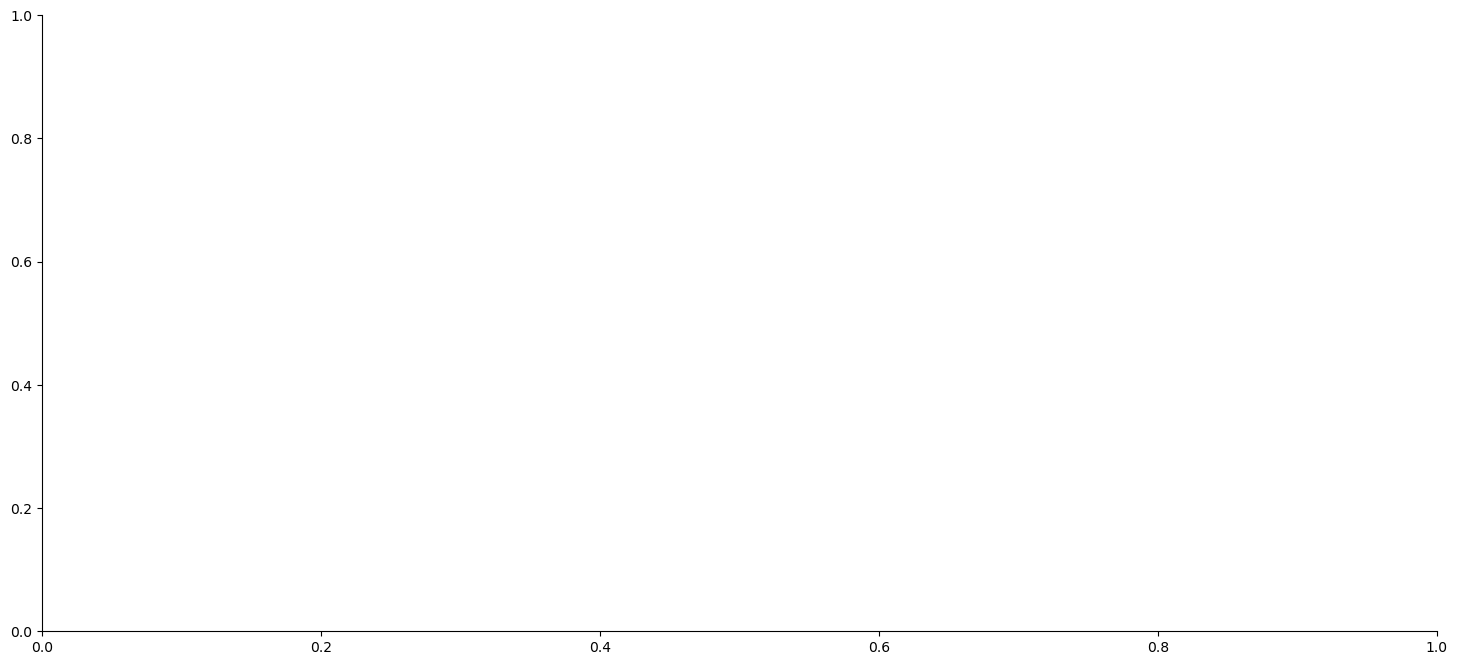

In [49]:
plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [51]:
predictions = model.predict(X_test_tf)

In [52]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [53]:
print(f'Accuracy: {metrics.accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {metrics.precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {metrics.recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.30
Precision: 0.30
Recall: 1.00


In [54]:
url = 'http://localhost:8000/lexer'

def lexer(code):
    data = {"code" : code}
    x = requests.post(url, data=data)
    return json.loads(x.text)["tokens"]

## Custom word embedding using Transformers

In [55]:
import tensorflow as tf

In [56]:
from transformers import AutoTokenizer

old_tokenizer = AutoTokenizer.from_pretrained("gpt2")

ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

In [ ]:
def get_training_corpus():
    dataset = df[df['error_check']!=1]
    for start_idx in range(0, len(dataset), 300):
        samples = dataset[start_idx : start_idx + 300]
        yield samples["code"]

In [ ]:
example = '''#include <stdio.h>
#include <stdlib.h>
int main() {
	int i,siz1,siz2;
	scanf(""%d"",siz1);
	scanf(""%d"",siz2);
	char ch1[siz1];
	char ch2[siz2];
	for(i=0;i<siz1;i++)
	ch1[i]= getchar();
	for(i=0;i<siz1;i++)
	putchar(ch1[i]);
	return 0;
}'''

tokens = old_tokenizer.tokenize(example)
tokens

In [57]:
training_corpus = get_training_corpus()
training_corpus

NameError: name 'get_training_corpus' is not defined

In [ ]:
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 3000)

In [ ]:
tokens = tokenizer.tokenize(example)
tokens

In [ ]:
print(len(tokens))
print(len(old_tokenizer.tokenize(example)))

In [ ]:
tokenized = tokenizer.tokenize(example)
tokenized

In [ ]:
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

bert_input = tokenizer.encode_plus(
                        example,                      
                        add_special_tokens = True, # add [CLS], [SEP]
                        max_length = 300, # max length of the text that can go to BERT
                        padding='longest', # add [PAD] tokens
                        return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

print('encoded', bert_input)

In [ ]:
from transformers import GPT2LMHeadModel, AutoConfig

config = AutoConfig.from_pretrained(
    "gpt2",
    vocab_size=len(tokenizer),
    n_ctx=128,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    output_attentions=True
    
)

In [ ]:
model = GPT2LMHeadModel(config)
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1000**2:.1f}M parameters")

In [ ]:
from transformers import TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

In [ ]:
learning_rate = 2e-5

# optimizer Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

# Tokenize the input (takes some time)
x_train = tokenizer(
          text=X_train.to_list(),
          add_special_tokens=True,
          max_length=300,
          truncation=False,
          padding=True, 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          verbose = True)

x_val = tokenizer(
          text=X_test.to_list(),
          add_special_tokens=True,
          max_length=300,
          truncation=True,
          padding=True, 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x_train['input_ids']},
    y={'error_check': y_train},
    validation_data=({'input_ids': x_val['input_ids']},{'error_check': y_test}),
    batch_size=100,
    epochs=2,
    verbose=1)

In [ ]:
model_eval = model.evaluate(
    x={'input_ids': x_val['input_ids']},
    y={'error_check': y_test}
)

In [ ]:
y_val_predicted = model.predict(
    x={'input_ids': x_val['input_ids']},
)

In [ ]:
y_val_pred_max=[np.argmax(i) for i in y_val_predicted['error_check']]

In [ ]:
y_val_actual_max=[np.argmax(i) for i in y_val]

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_val_pred_max, y_val_actual_max)
print(report)